# Cluster Based Analysis for Patients with BB

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

% matplotlib inline

In [70]:
import pandas as pd
data = pd.read_csv("/Users/joudsi/Desktop/17.07.19/subdata_bb_norm_clustered.csv")

In [71]:
data.head()

,Unnamed: 0,amdission_age,gender,heartrate_mean,meanbp_mean,sysbp_mean,tempc_mean,spo2_mean,resprate_mean,diasbp_mean,...,albumin_mean,bands_mean,bilirubin_mean,hemoglobin_mean,ptt_mean,inr_mean,pt_mean,bun_mean,clust,is_AKI
0,0,0.558335,0.0,0.420142,0.538685,0.607481,0.713859,0.903968,0.346149,0.452554,...,0.466246,0.142273,0.041618,0.820529,0.065721,0.014585,0.035408,0.026851,4,0
1,1,0.967606,0.0,0.251775,0.467465,0.728568,0.684853,0.905051,0.322675,0.400575,...,0.466246,0.142273,0.007797,0.555009,0.170775,0.030103,0.073783,0.046379,1,0
2,2,0.908553,0.0,0.201747,0.473796,0.747566,0.580397,0.988272,0.180286,0.388677,...,0.466246,0.142273,0.041618,0.414874,0.312547,0.010027,0.028165,0.314890,1,0
3,3,0.585965,0.0,0.287335,0.281486,0.415570,0.588939,0.950327,0.240689,0.301600,...,0.238095,0.142273,0.224172,0.385372,0.154593,0.043756,0.126073,0.146461,3,0
4,4,0.545732,1.0,0.424039,0.365803,0.367042,0.706385,0.954789,0.324970,0.388354,...,0.466246,0.142273,0.041618,0.414054,0.128454,0.026740,0.059371,0.063466,2,0


In [72]:
print("# of observations: ", str(len(data.index)))

('# of observations: ', '5997')


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5997 entries, 0 to 5996
Data columns (total 30 columns):
Unnamed: 0          5997 non-null int64
amdission_age       5997 non-null float64
gender              5997 non-null float64
heartrate_mean      5997 non-null float64
meanbp_mean         5997 non-null float64
sysbp_mean          5997 non-null float64
tempc_mean          5997 non-null float64
spo2_mean           5997 non-null float64
resprate_mean       5997 non-null float64
diasbp_mean         5997 non-null float64
creatinine_mean     5997 non-null float64
potassium_mean      5997 non-null float64
sodium_mean         5997 non-null float64
chloride_mean       5997 non-null float64
bicarbonate_mean    5997 non-null float64
hematocrit_mean     5997 non-null float64
wbc_mean            5997 non-null float64
glucose_mean        5997 non-null float64
lactate_mean        5997 non-null float64
aniongap_mean       5997 non-null float64
albumin_mean        5997 non-null float64
bands_mean   

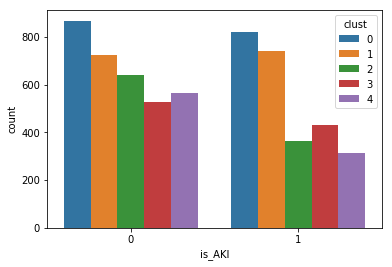

In [74]:
sns.countplot(x="is_AKI", hue="clust",data=data)

## LR Analysis C0

In [75]:
data.head()

,Unnamed: 0,amdission_age,gender,heartrate_mean,meanbp_mean,sysbp_mean,tempc_mean,spo2_mean,resprate_mean,diasbp_mean,...,albumin_mean,bands_mean,bilirubin_mean,hemoglobin_mean,ptt_mean,inr_mean,pt_mean,bun_mean,clust,is_AKI
0,0,0.558335,0.0,0.420142,0.538685,0.607481,0.713859,0.903968,0.346149,0.452554,...,0.466246,0.142273,0.041618,0.820529,0.065721,0.014585,0.035408,0.026851,4,0
1,1,0.967606,0.0,0.251775,0.467465,0.728568,0.684853,0.905051,0.322675,0.400575,...,0.466246,0.142273,0.007797,0.555009,0.170775,0.030103,0.073783,0.046379,1,0
2,2,0.908553,0.0,0.201747,0.473796,0.747566,0.580397,0.988272,0.180286,0.388677,...,0.466246,0.142273,0.041618,0.414874,0.312547,0.010027,0.028165,0.314890,1,0
3,3,0.585965,0.0,0.287335,0.281486,0.415570,0.588939,0.950327,0.240689,0.301600,...,0.238095,0.142273,0.224172,0.385372,0.154593,0.043756,0.126073,0.146461,3,0
4,4,0.545732,1.0,0.424039,0.365803,0.367042,0.706385,0.954789,0.324970,0.388354,...,0.466246,0.142273,0.041618,0.414054,0.128454,0.026740,0.059371,0.063466,2,0


In [76]:
data0 = data[data['clust']==0]

In [77]:
t = data0.drop("is_AKI", axis=1)
X0 = t.drop('clust', axis = 1)
Y0 = data0["is_AKI"]

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X0,Y0, test_size=0.3, random_state=1)

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
logmodel = LogisticRegression()

In [82]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [83]:
predictions = logmodel.predict(X_test)

In [84]:
from sklearn.metrics import classification_report

In [85]:
classification_report(y_test, predictions)

u'              precision    recall  f1-score   support\n\n           0       0.67      0.71      0.69       279\n           1       0.62      0.58      0.60       229\n\n   micro avg       0.65      0.65      0.65       508\n   macro avg       0.65      0.64      0.64       508\nweighted avg       0.65      0.65      0.65       508\n'

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
confusion_matrix(y_test, predictions)

array([[198,  81],
       [ 97, 132]])

### Calculate Accuracy

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
accuracy_score(y_test, predictions)

0.6496062992125984

## LR Analysis C1

In [116]:
data1 = data[data['clust']==1]

In [117]:
data1.head()

,Unnamed: 0,amdission_age,gender,heartrate_mean,meanbp_mean,sysbp_mean,tempc_mean,spo2_mean,resprate_mean,diasbp_mean,...,albumin_mean,bands_mean,bilirubin_mean,hemoglobin_mean,ptt_mean,inr_mean,pt_mean,bun_mean,clust,is_AKI
1,1,0.967606,0.0,0.251775,0.467465,0.728568,0.684853,0.905051,0.322675,0.400575,...,0.466246,0.142273,0.007797,0.555009,0.170775,0.030103,0.073783,0.046379,1,0
2,2,0.908553,0.0,0.201747,0.473796,0.747566,0.580397,0.988272,0.180286,0.388677,...,0.466246,0.142273,0.041618,0.414874,0.312547,0.010027,0.028165,0.314890,1,0
6,6,0.957568,0.0,0.597882,0.508615,0.393588,0.544096,0.860000,0.487780,0.512280,...,0.380952,0.133627,0.013645,0.650891,0.135922,0.029170,0.063305,0.246542,1,0
7,7,0.896536,0.0,0.275652,0.254333,0.336593,0.613496,0.992593,0.232354,0.316499,...,0.690476,0.142273,0.023392,0.496005,0.249440,0.268611,0.613019,0.518308,1,1
13,13,0.848335,0.0,0.287222,0.420797,0.543052,0.638053,0.964021,0.213564,0.383451,...,0.666667,0.142273,0.005848,0.389797,0.081653,0.015801,0.039700,0.113100,1,1


In [118]:
t = data1.drop("is_AKI", axis=1)
X1 = t.drop('clust', axis = 1)
Y1 = data1["is_AKI"]

In [119]:
X1.shape

(1466, 28)

In [120]:
Y1.shape

(1466,)

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size=0.3, random_state=1)

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
logmodel = LogisticRegression()

In [125]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [126]:
predictions = logmodel.predict(X_test)

In [127]:
from sklearn.metrics import classification_report

In [128]:
classification_report(y_test, predictions)

u'              precision    recall  f1-score   support\n\n           0       0.65      0.59      0.62       231\n           1       0.59      0.65      0.62       209\n\n   micro avg       0.62      0.62      0.62       440\n   macro avg       0.62      0.62      0.62       440\nweighted avg       0.62      0.62      0.62       440\n'

In [109]:
from sklearn.metrics import confusion_matrix

In [110]:
confusion_matrix(y_test, predictions)

array([[136,  95],
       [ 73, 136]])

### Calculate Accuracy

In [111]:
from sklearn.metrics import accuracy_score

In [112]:
accuracy_score(y_test, predictions)

0.6181818181818182

## LR Analysis C2

In [141]:
data2 = data[data['clust']==2]

In [142]:
data2.head()

,Unnamed: 0,amdission_age,gender,heartrate_mean,meanbp_mean,sysbp_mean,tempc_mean,spo2_mean,resprate_mean,diasbp_mean,...,albumin_mean,bands_mean,bilirubin_mean,hemoglobin_mean,ptt_mean,inr_mean,pt_mean,bun_mean,clust,is_AKI
4,4,0.545732,1.0,0.424039,0.365803,0.367042,0.706385,0.954789,0.324970,0.388354,...,0.466246,0.142273,0.041618,0.414054,0.128454,0.026740,0.059371,0.063466,2,0
5,5,0.320255,1.0,0.614990,0.329273,0.333942,0.689836,0.935043,0.473174,0.374938,...,0.466246,0.142273,0.038986,0.269822,0.123724,0.020662,0.059371,0.056143,2,0
8,8,0.518038,1.0,0.381154,0.501756,0.555573,0.769379,0.985185,0.253968,0.430876,...,0.466246,0.142273,0.041618,0.675476,0.051531,0.010939,0.028970,0.041497,2,1
19,19,0.637268,1.0,0.155615,0.492382,0.727575,0.562246,0.986667,0.238918,0.450504,...,0.466246,0.142273,0.041618,0.407498,0.097834,0.014585,0.042918,0.136697,2,0
23,23,0.892517,1.0,0.468095,0.616832,0.758228,0.793871,0.967742,0.233942,0.445641,...,0.466246,0.142273,0.041618,0.543946,0.061240,0.007293,0.023605,0.053702,2,0


In [143]:
t = data2.drop("is_AKI", axis=1)
X2 = t.drop('clust', axis = 1)
Y2 = data2["is_AKI"]

In [144]:
X2.shape

(1003, 28)

In [145]:
Y2.shape

(1003,)

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X2,Y2, test_size=0.3, random_state=1)

In [148]:
from sklearn.linear_model import LogisticRegression

In [149]:
logmodel = LogisticRegression()

In [150]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [151]:
predictions = logmodel.predict(X_test)

In [152]:
from sklearn.metrics import classification_report

In [153]:
classification_report(y_test, predictions)

u'              precision    recall  f1-score   support\n\n           0       0.59      0.97      0.74       174\n           1       0.69      0.09      0.15       127\n\n   micro avg       0.60      0.60      0.60       301\n   macro avg       0.64      0.53      0.45       301\nweighted avg       0.63      0.60      0.49       301\n'

In [154]:
from sklearn.metrics import confusion_matrix

In [155]:
confusion_matrix(y_test, predictions)

array([[169,   5],
       [116,  11]])

### Calculate Accuracy

In [156]:
from sklearn.metrics import accuracy_score

In [157]:
accuracy_score(y_test, predictions)

0.5980066445182725

## LR Analysis C3

In [158]:
data3 = data[data['clust']==3]

In [159]:
data3.head()

,Unnamed: 0,amdission_age,gender,heartrate_mean,meanbp_mean,sysbp_mean,tempc_mean,spo2_mean,resprate_mean,diasbp_mean,...,albumin_mean,bands_mean,bilirubin_mean,hemoglobin_mean,ptt_mean,inr_mean,pt_mean,bun_mean,clust,is_AKI
3,3,0.585965,0.0,0.287335,0.281486,0.415570,0.588939,0.950327,0.240689,0.301600,...,0.238095,0.142273,0.224172,0.385372,0.154593,0.043756,0.126073,0.146461,3,0
17,17,0.513992,0.0,0.337005,0.331191,0.346742,0.732009,0.917172,0.355990,0.328463,...,0.357143,0.142273,0.007797,0.252612,0.099328,0.018232,0.047210,0.056143,3,0
21,21,0.592988,0.0,0.398976,0.298505,0.346561,0.747758,0.960943,0.388422,0.360388,...,0.466246,0.142273,0.009747,0.400123,0.566094,0.074749,0.208691,0.043938,3,1
25,25,0.663400,0.0,0.451031,0.369274,0.513134,0.723468,0.904889,0.391675,0.384910,...,0.466246,0.142273,0.041618,0.409342,0.091113,0.018232,0.050429,0.329536,3,1
26,26,0.472171,0.0,0.419625,0.375191,0.230277,0.776852,0.995960,0.620811,0.366445,...,0.466246,0.142273,0.007797,0.352182,0.601382,0.045579,0.081545,0.361269,3,1


In [163]:
t = data3.drop("is_AKI", axis=1)
X3 = t.drop('clust', axis = 1)
Y3 = data3["is_AKI"]

In [164]:
X3.shape

(960, 28)

In [165]:
Y3.shape

(960,)

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X3,Y3, test_size=0.3, random_state=1)

In [168]:
from sklearn.linear_model import LogisticRegression

In [169]:
logmodel = LogisticRegression()

In [170]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [171]:
predictions = logmodel.predict(X_test)

In [172]:
from sklearn.metrics import classification_report

In [173]:
classification_report(y_test, predictions)

u'              precision    recall  f1-score   support\n\n           0       0.63      0.83      0.72       156\n           1       0.68      0.42      0.52       132\n\n   micro avg       0.65      0.65      0.65       288\n   macro avg       0.66      0.63      0.62       288\nweighted avg       0.65      0.65      0.63       288\n'

In [174]:
from sklearn.metrics import confusion_matrix

In [175]:
confusion_matrix(y_test, predictions)

array([[130,  26],
       [ 76,  56]])

### Calculate Accuracy

In [176]:
from sklear### Calculate Accuracyn.metrics import accuracy_score

In [177]:
accuracy_score(y_test, predictions)

0.6458333333333334

## LR Analysis C4

In [178]:
data4 = data[data['clust']==4]

In [179]:
data4.head()

,Unnamed: 0,amdission_age,gender,heartrate_mean,meanbp_mean,sysbp_mean,tempc_mean,spo2_mean,resprate_mean,diasbp_mean,...,albumin_mean,bands_mean,bilirubin_mean,hemoglobin_mean,ptt_mean,inr_mean,pt_mean,bun_mean,clust,is_AKI
0,0,0.558335,0.0,0.420142,0.538685,0.607481,0.713859,0.903968,0.346149,0.452554,...,0.466246,0.142273,0.041618,0.820529,0.065721,0.014585,0.035408,0.026851,4,0
11,11,0.393875,0.0,0.265834,0.442334,0.485533,0.660688,0.938384,0.205227,0.399758,...,0.466246,0.142273,0.041618,0.727105,0.098581,0.010939,0.035408,0.051261,4,0
18,18,0.551827,0.0,0.418955,0.381762,0.406217,0.658754,0.931185,0.363957,0.396145,...,0.466246,0.142273,0.041618,0.577136,0.096341,0.010939,0.028970,0.073230,4,0
20,20,0.432388,0.0,0.398466,0.743532,0.697167,0.662182,0.908333,0.221600,0.646881,...,0.466246,0.142273,0.041618,0.621389,0.170775,0.030103,0.073783,0.109845,4,0
27,27,0.818749,0.0,0.359255,0.374236,0.380616,0.648729,0.974411,0.292583,0.353794,...,0.642857,0.030837,0.013645,0.700061,0.051158,0.014585,0.042382,0.031733,4,0


In [180]:
t = data4.drop("is_AKI", axis=1)
X4 = t.drop('clust', axis = 1)
Y4 = data4["is_AKI"]

In [181]:
X4.shape

(877, 28)

In [182]:
Y4.shape

(877,)

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X4,Y4, test_size=0.3, random_state=1)

In [185]:
from sklearn.linear_model import LogisticRegression

In [186]:
logmodel = LogisticRegression()

In [187]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [188]:
predictions = logmodel.predict(X_test)

In [189]:
from sklearn.metrics import classification_report

In [190]:
classification_report(y_test, predictions)

u'              precision    recall  f1-score   support\n\n           0       0.69      0.90      0.78       174\n           1       0.55      0.23      0.33        90\n\n   micro avg       0.67      0.67      0.67       264\n   macro avg       0.62      0.57      0.56       264\nweighted avg       0.65      0.67      0.63       264\n'

In [191]:
from sklearn.metrics import confusion_matrix

In [192]:
confusion_matrix(y_test, predictions)

array([[157,  17],
       [ 69,  21]])

### Calculate Accuracy

In [193]:
from sklearn### Calculate Accuracy.metrics import accuracy_score

In [194]:
accuracy_score(y_test, predictions)

0.6742424242424242